# Анализ людей в социальной сети ВК

##### Задача:
Создать инструмент для кластеризации аккаунтов социальной сети ВК и анализа обьединяющих признаков.

##### Зачем может применяться:
1. Рекламы в соц. сетях 
2. Проведения эксперементов в области социологии
3. Создания баз данных похожих пользователей, для различных целей
4. Продвижение в соц. сетях

##### Этот файл состоит из 3 частей:
1. Теория
2. Тестовый запуск
3. Запуск на рельном пользователе сети

##### Использованная литература:
[1] Наглядная математичекая статистика (М.Б Лагутин)

[2] Тематическое моделирование в BigARTM: теория, алгоритмы, приложения (К.В.Воронцов,А.И.Фрей)

[3] Проверка гипотез об однородности и симметричности распределений для многомерных данных (Н.К Бакиров)

[4] http://www.machinelearning.ru/

## Теория
$\textbf{Введение к работе:}$

В настоящем мире ежедневно миллионы человек, вставая с утра с кровати, первым делом заходят на свою страницу и бороздят просторы соц. сети, пока не приходит время делать что-то более важное. Со временем на странице скапливается большое количество информации. Инфорамция о привычках, хобби, увлечениях, политических вглядах - все в той или иной степени оседает на странице пользователя. Некоторые люди даже не задумываются, какой информационный след они оставляют о себе в соц. сетях.

Идея этой работы заключается в том, чтобы проанализировать один из источников информации о пользователе и на основе этих данных обьединить пользователей по категориям и дать исследователю возможность изучить характерные признаки для группы. В качестве источника информации мы возьмем стену пользователя соц. сети.

(Настояшая работа создавалась как инструмент изучения окружения обычного пользователя соц. сети, но по факту может использоваться в различных приложениях и для различных целей. Представленный здесь код можно быстро переориентировать для анализа контента других соц. сетей или источников информации.)

$\textbf{Приближения и идея работы:}$

Первое приближение нашей работы будет заключаться в том, что мы будем отождествлять пользователя с информацией на стене его аккаунта.
Конечно, это не совсем правильно, ведь есть много других модальностей, которые также несут инфорацию, но в рамках этой работы они будут проигнорированы.

Второе приближение работы связано с приближениями использованными в алгоритмах BigARTM, такими как мешок слов, например. Подробнее о полном наборе этих приближений можно прочитать в [2].

После нескольких экспериментов с векторными моделями я пришел к выводу, что для данной задачи они малоприменимы. Поэтому я обратился к более мощному инструменту для анализа текстов, а именно к тематическому моделированию, который после нескольких пробных запусков сразу показал свою способность выделять интерпретируемые темы из данного набора текстов. Отсюда идея: пусть каждый пользователь будет характеризоваться своим собственным распределением по темам.

После построения модели в руках у исследователя появляются матрицы $\Phi$ и $\Theta$, вторая из них и будет являться матрицей объект/признаки. После получения матрицы $\Theta$ перед исследователем встает обычная задача кластеризации.

Далее мы опишем каждый шаг работы более подробно. 

$\textbf{Откуда берется текст? :}$

У каждого аккаунта соц. сети есть выделенное место, куда владелец аккаунта и его друзья могут писать сообщения. Это место называют стена.
Каждый документ обрабатываемой коллекции представляет собой 100 первых записей со стены у друга исследуемого пользователя соц. сети.
В итоге наша коллекция состоит из текстов с аккаунтов друзей исследуемого пользователя. Цифра 100 была выбрана, потому что API VK не разрешает скачивать больше записей у одного аккаунта. 

Иногда пользователь не разрешает просматривать свою стену программе, поэтому итоговое количесво документов - это количество друзей минус те из них, кто запретили исследовать их стену.

$\textbf{Как производилась предобработка текста? :}$

После первого же построения тематической модели становится понятно, что предобработка текста в этом случае будет не совсем обычной.
Те работы, что попадались мне во время подготовки, использовали стандартные стеммеры и списки стоп-слов из некоторой стандартной библиотеки (к примеру SnowballStemmer). В случае с соц. сетями этот подход малоприменим из-за огромного количесва жаргонных стоп-слов, которых нет в стандартных списках. Поэтому пришлось делать свой собсвенный список стоп-слов. Но одного человека мало для подобной задачи, так что для решения этой проблемы вскоре будет запушен сайт, где желающие смогут помочь проекту. 

$\textbf{Как строилась тематическая модель? :}$

Этот пункт лучше всего начать с обоснования выбора регуляризаторов и коэффицентов к ним.

В этом проекте было выбранно 3 регуляризатора, а именно - разреживание $\Phi$, разреживание $\Theta$ и декоррелятор $\Theta$.

Разреживания $\Phi$ и $\Theta$ были выбраны для того, чтобы удовлетворять гипотезе разреженности (ведь для реализации последующей кластеризации тот факт, что матрицы разрежены, может сыграть на руку) и чтобы уменьшить энтропию распределения.

Декоррелятор $\Theta$ был выбран, так как после кластеризации исследователь должен ответить на вопрос, какая тема объединяет каждый кластер. Декоррелятор $\Theta$ способствует увеличению различности тем, тем самым облегчая исследователю его задачу.

Как описано в [4] и [2], автоматическая коррекция стратегий регуляризации является открытой проблемой машинного обучения, поэтому, подобрав коэффиценты на одном пользователе так, чтобы перплексия модели не сильно падала на фоне повышения разреженности матриц $\Phi$ и $\Theta$, я стал использовать эти коэффиценты без изменения в дальнейших экспериментах.

Каждая коллекция документов уникальна, значит, количество тем в каждой модели будет различно.

Тем не менее, модель ARTM [2] дает возможность определить оптимальное количество тем для каждой коллекции документов. Будем считать, что количесво тем T оптимально, если после того как была построена модель $\forall t \in T\ \varphi_t \neq 0$ ,но если построить модель для T' = T+1, то $\exists t \in T': \varphi_t = 0$

$\textbf{Как проводилась кластеризация? :}$

Идеальных или лучших алгоритмов кластеризации не существует. Согласно [1], при большом количесве объектов следует выбирать быстрые иерархические процедуры для редуктивных мер отдаленности. Поэтому в качестве алгоритма кластеризации был выбран иерархический алгоритм по методу Уорда. Так же в [1] говорилось, что выбранный нами алгоритм показался автору наилучшим по восстанавливаемости разбиения.

$\textbf{Как решить задачу неизвестного количества кластеров? :}$

После получения дендрограммы, следует решить, как провести черту, чтобы получить наиболее правдоподобное кол-во кластеров.
В этой работе предложен следующий подход к решению этой проблемы.

В каждом узле дендрограммы происходит разделения множества объектов на 2 подмножества. Чтобы решить, нужен ли этот шаг или нет, предлагается провести тест на однородность данных для каждого узла.

Согласно [3], алгоритм проверки однородности многомерных данных следующий:
1. Рассмотрим узел $k$
2. Пусть все левые листья узла $k$ это множество $X = \{x_1,x_2,...,x_n\}$
3. Пусть все правые листья узла $k$ это множество $Y = \{y_1,y_2,...,y_m\}$
4. Пусть $S_1 = \frac{1}{n^2}\sum\limits_{i,j = 1}^{n}|x_i - x_j|$
5. Пусть $S_2 = \frac{1}{m^2}\sum\limits_{i,j = 1}^{n}|y_i - y_j|$
6. Пусть $S_2 = \frac{1}{mn}\sum\limits_{i = 1}^{n}\sum\limits_{j = 1}^{m}|x_i - y_j|$
7. Если $Q = 1 - \frac{S_1 + S_2}{2S3} = 0$, то тест пройден. В противном случае нет.

Каждое прошедшее тест дерево мы будем окрашивать в один цвет. Тогда по дереву будет просто провести границу так, чтобы разделить кластеры наиболее разумно.

$\textbf{Резюме :}$

После выполнения пунктов, описанных выше, исследователь получает на руки матрицу люди/признаки/кластеры.
Оперируя с этой матрицей, можно найти ответы на интерессующие вопросы о своем окружении в соц. сети.


## Тестовый запуск

В этой части работы мы покажем работу алгоритма на специально созданном аккаунте в соц. сети VK

В друзья этого аккаунта добавлены 9 людей, а именно:

$\textbf{Политики:}$

Юнус-Бек Евкуров - глава Ингушетии

Сергей Миронов - руководитель фракции партии «Справедливая Россия»

Дмитрий Медведев - председатель Правительства Российской Федерации

Рамзан Кадыров - глава Чеченской републики

$\textbf{Преподаватели МФТИ:}$

Пенкин Михаил - преподаватель физики на первом курсе

Имран Алкескеров - преподаватель физики на втором курсе

$\textbf{Рэп-исполнители:}$

Стас Конченков

Big Russian Boss

$\textbf{Борцы:}$

Бувайсар Сайтиев - многократный олимпийский чемпион в вольной борьбе

### Добавим библиотеку,в которой прописаны все функции для выполнения задачи

In [49]:
import my_vk
%matplotlib inline

### Вводим id тестового аккаунта

In [2]:
id = 360960126

### Получаем информацию из социальной сети

In [3]:
#Перед запуском этой функции создайте файл my_stop_words.txt в папке с библиотекой для записи ваших стоп-слов
#Sub - получаем информацию о подписках пользователя
#Friends - получаем информацию о друзьях пользователя
pairs,vectors,vocab,D,bad_users = my_vk.get_docs(id,'Sub')
#Алгоритм возвращает: пары [id,текст], вектора частот для каждого документа, словарь, количесво документов, количество пользователей
#стены, которых не получилось обработать из-за ограничений сайта ВК.

Connecting to the server
Getting subscriptions ids
Getting text from friends walls
("Number of 'bad wall' users -", 0)
Starting text preprocessing
Sucess!


### Создаем файлы типа bag-of-words и словарь для полученной информации

In [4]:
my_vk.create_doc(vectors,vocab,D)
my_vk.create_voc(vocab)

### В этом пункте запускаем функцию, которая построит тематическую модель ARTM для оптимального количества тем

In [5]:
# В качестве параметра T указывается количество тем, начиная с которого алгоритм будет искать оптимальное их количество.
# Если поставить параметр слишком большим, то алгоритм выберет именно его в качестве оптимального количества тем.
# Если же вы не уверены в количестве тем, то можно положить T = 1, но тогда готовьтесть к продолжительному времени работы.
# Практика показывает, что иногда стоит брать чуть меньше оптимально количества тем, для этого есть парамметр P, который показывает,
# какой процент от оптимального количесва тем будет взят.
n, model = my_vk.create_model(T = 10,P = 0.8)
#Алгоритм возвращает: оптимальное количесво тем, тематическую модель.

### Проилюстрируем то, что матрицы сошлись

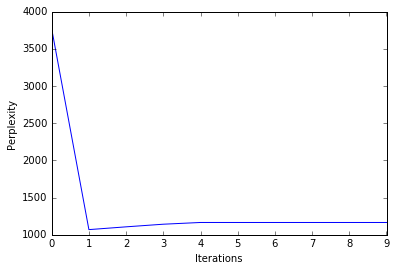

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Iterations')
plt.ylabel('Perplexity')
plt.plot(range(model.num_phi_updates), model.score_tracker['PerplexityScore'].value)

### Посмотрим на полученную матрицу - пользователи/признаки 

In [7]:
theta_matrix = model.fit_transform()
M = theta_matrix.T
M

,@topic_0,@topic_1,@topic_2,@topic_3,@topic_4,@topic_5,@topic_6,@topic_7,@topic_8,@topic_9,@topic_10,@topic_11
0,0.030411,0.000000,0.000000,0.173524,0.00000,0.000000,0.101968,0.000000,0.245081,0.066190,0.316637,0.066190
1,0.000000,0.052795,0.000000,0.052795,0.00000,0.363354,0.000000,0.052795,0.425466,0.000000,0.052795,0.000000
2,0.000000,0.000000,0.000000,0.444805,0.00000,0.000000,0.000000,0.120130,0.000000,0.000000,0.250000,0.185065
3,0.000000,0.000000,0.000000,0.212687,0.00000,0.000000,0.000000,0.000000,0.000000,0.287313,0.436567,0.063433
4,0.046658,0.000000,0.021438,0.021438,0.00000,0.021438,0.097100,0.071879,0.000000,0.021438,0.651955,0.046658
5,0.895921,0.000000,0.000000,0.000000,0.02391,0.080169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.811224,0.000000,0.000000,0.028912,0.00000,0.130952,0.000000,0.028912,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.039443,0.000000,0.00000,0.921114,0.000000,0.039443,0.000000,0.000000,0.000000,0.000000


### Запускаем иерархический алгоритм кластеризации по методу Уорда

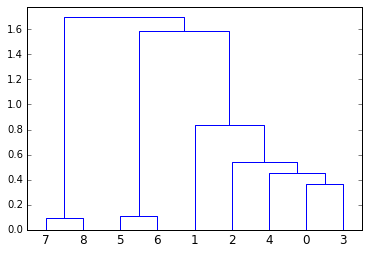

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram
z = linkage(M, method= 'ward')
def color1(k):
    return 'b'
p = dendrogram(z,get_leaves=1,link_color_func=color1,no_labels = 0,show_leaf_counts = 1)

### Вводим границу, которая разделит кластеры

Это важный шаг, выполнение которого вызывает проблемы при незнании количества кластеров, но при тестовом запуске количество кластеров известно, поэтому шаг выполняется тривиально

In [9]:
delta = 0.6

Получим кластеры для заданной границы

In [10]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(z, delta, criterion='distance')
print('Amount of clusters in result ',clusters.max())

('Amount of clusters in result ', 4)


### Создадим готовую матрицу пользователи/признаки/кластеры/реальные кластеры

Получим id всех подписок

In [11]:
import numpy as np
list_ = np.array(pairs)
ids = list_[:,0]

Узнаем их имена

In [12]:
import vk
session = vk.Session()
api = vk.API(session)
info = api.users.get(user_ids = ids)

new_column = []
for obj in info:
    new_column.append(obj['first_name'] + ' ' + obj['last_name'])

Добавим к изначальной матрице полученные столбцы. 

Добавим реальные кластеры пользователей и взглянем на результат

In [13]:
M['cluster'] = clusters
M['names'] = new_column
M['real'] = ['politic',\
             'fighter',\
             'politic',\
             'politic',\
             'politic',\
             'rap singer',\
             'rap singer',\
             'foxford',\
             'foxford',\
            ]
M

,@topic_0,@topic_1,@topic_2,@topic_3,@topic_4,@topic_5,@topic_6,@topic_7,@topic_8,@topic_9,@topic_10,@topic_11,cluster,names,real
0,0.030411,0.000000,0.000000,0.173524,0.00000,0.000000,0.101968,0.000000,0.245081,0.066190,0.316637,0.066190,3,Юнус-Бек Евкуров,politic
1,0.000000,0.052795,0.000000,0.052795,0.00000,0.363354,0.000000,0.052795,0.425466,0.000000,0.052795,0.000000,4,Бувайсар Сайтиев,fighter
2,0.000000,0.000000,0.000000,0.444805,0.00000,0.000000,0.000000,0.120130,0.000000,0.000000,0.250000,0.185065,3,Сергей Миронов,politic
3,0.000000,0.000000,0.000000,0.212687,0.00000,0.000000,0.000000,0.000000,0.000000,0.287313,0.436567,0.063433,3,Дмитрий Медведев,politic
4,0.046658,0.000000,0.021438,0.021438,0.00000,0.021438,0.097100,0.071879,0.000000,0.021438,0.651955,0.046658,3,Рамзан Кадыров,politic
5,0.895921,0.000000,0.000000,0.000000,0.02391,0.080169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,Стас Конченков,rap singer
6,0.811224,0.000000,0.000000,0.028912,0.00000,0.130952,0.000000,0.028912,0.000000,0.000000,0.000000,0.000000,2,Big Russian Boss,rap singer
7,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,Михаил Пенкин,foxford
8,0.000000,0.000000,0.039443,0.000000,0.00000,0.921114,0.000000,0.039443,0.000000,0.000000,0.000000,0.000000,1,Имран Алескеров,foxford


### Посмотрим на результаты работы алгоритма

Построим матрицу кластеры/реальные кластеры, если ее можно привести к виду, где на диагонали стоят наибольшие числа в столбце, то из этого можно сделать вывод, что алгоритм распределил людей по роду их деятельности

In [14]:
import pandas as pd
p = pd.DataFrame()
list_1 = [1,2,3,4]
list_2 = ['foxford','rap singer','politic','fighter']

In [15]:
for i in list_2:
    l = []
    for j in list_1:
        l.append(((M['cluster'] == j)&(M['real'] == i)).sum())
    p[i] = l

In [16]:
p

,foxford,rap singer,politic,fighter
0,2,0,0,0
1,0,2,0,0
2,0,0,4,0
3,0,0,0,1


Как мы видим из матрицы выше, на этом примере алгоритм сработал хорошо, так как матрица получилась диагональной.

Можно заметить, что некоторые темы особенно характерны для некоторых кластеров.

К примеру для рэп-исполнителей особенно характерна тема под номером 0, а для преподавателей - тема под номером 5

Давайте взглянем на них

$\textbf{Рэп-исполнители}$

In [17]:
my_vk.print_list(model.score_tracker['TopTokensScore'].last_topic_info['@topic_0'].tokens)

god
релиз
rap
сингл
album
hard


$\textbf{Учителя}$

In [18]:
my_vk.print_list(model.score_tracker['TopTokensScore'].last_topic_info['@topic_5'].tokens)

портал
выйдет
мастеркласс
телефон
black
живт


Видно, что темы интерпретируемы

## Запуск на реальном пользователе сети

В этой части работы давайте попробуем проанализировать аккаунт реального пользователя сети.

В качестве аккаунта мы возьмем аккаунт моей одногрупницы (Ксении Шевчук) , которая любезно разрешила мне воспользоваться им.

(Дальнейшую запись кода я комментировать не буду, так как все подробности были объяснены ранее)

$\textbf{Получим информацию о друзьях}$

In [60]:
id = 37201652
pairs,vectors,vocab,D,bad_users = my_vk.get_docs(id,'Friends')
my_vk.create_doc(vectors,vocab,D)
my_vk.create_voc(vocab)

Connecting to the server
Getting friends ids
Getting text from friends walls
("Number of 'bad wall' users -", 201)
Starting text preprocessing
Sucess!


$\textbf{Построим тематическую модель}$

In [61]:
n, model = my_vk.create_model(T = 1,P = 0.9)

$\textbf{Посмотрим на интерпритируемость некоторых полученных тем}$

In [65]:
for topic_name in ['@topic_4','@topic_5','@topic_6','@topic_8','@topic_12']:
    print topic_name + ': ',
    my_vk.print_list(model.score_tracker['TopTokensScore'].last_topic_info[topic_name].tokens)
    print '\n'

@topic_4:  фильм
концерт
билет
студент
клуб
конкурс


@topic_5:  физтех
мфти
олимпиад
дан
курс
задач


@topic_6:  минут
тест
сахар
ст
готов
сыр


@topic_8:  школ
профессор
игра
студент
красив
книг


@topic_12:  слов
жим
мышц
кг
подход
ног




Из пункта выше видно что, 

тема 4  посвящена походам в кино, театр

тема 5  посвящена нашему дорогому вузу

тема 6  посвящена рецептам 

тема 8  посвящена школе и событиям, там проходившим

тема 12 посвящена спортсменам в тренажерном зале

$\textbf{Займемся кластеризацией}$

На этом шаге мы запустим построение линковки нашей выборки по методу Уорда и тут же запустим функцию, которая проведет тест однородности в каждом узле дендрограммы.  

In [66]:
theta_matrix = model.fit_transform()
M = theta_matrix.T
from scipy.cluster.hierarchy import linkage, dendrogram
z = linkage(M, method= 'ward')
res = my_vk.create_colors(z,M,0.2)

Теперь построим саму дендрограмму с новой 'умной' окраской

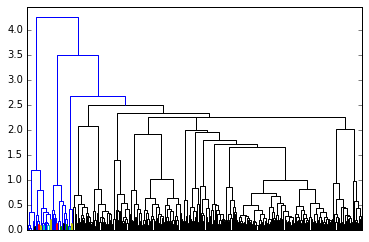

In [70]:
def color(k):
    for obj in res:
        if k in obj[0]:
            return obj[1]
    return 'b'
p = dendrogram(z, link_color_func=color,get_leaves=1,no_labels = 1,show_leaf_counts = 1)

Видно, что более половины друзей похожи. Давайте проведем границу так, чтобы минимально разделить одноцветный сегмент, но тем не менее отсечь как можно больше больших скачков расстояний.

In [89]:
delta = 1.5
clusters = fcluster(z, delta, criterion='distance')
print('Amount of clusters in result ',clusters.max())

('Amount of clusters in result ', 16)


Всего кластеров вышло 16 штук.
Теперь получим матрицу люди/признаки/кластеры

In [77]:
list_ = np.array(pairs)
ids = list_[:,0]
info = api.users.get(user_ids = ids)
new_column = []
for obj in info:
    new_column.append(obj['first_name'] + ' ' + obj['last_name'])
M['cluster'] = clusters
M['names'] = new_column

Анализируя полученную матрицу, можно отвечать на различные вопросы о окружении в соц сети.

К примеру, можно вычислить группу людей, которые больше всех интересуются нашим вузом.

In [100]:
list_ = []
for i in range(16):
    i += 1
    K = M[M['cluster'] == i]
    list_.append(K['@topic_5'].mean())

list_.index(np.array(list_).max()) + 1

5

Вышло, что этой группе соотвествует кластер под номером 5 

Давайте получим 4 самых ярких представителей этой группы и посмотрим, кем они являются на самом деле.

In [109]:
K = M[M['cluster'] == 5]
K[K['@topic_5'] > .5]

,@topic_0,@topic_1,@topic_2,@topic_3,@topic_4,@topic_5,@topic_6,@topic_7,@topic_8,@topic_9,@topic_10,@topic_11,@topic_12,@topic_13,cluster,names
2,0.000000,0.000000,0.008189,0.240349,0.000000,0.701855,0.000000,0.009187,0.000000,0.000000,0.000000,0.000000,0.000000,0.040420,5,Михаил Пенкин
63,0.014587,0.021659,0.058136,0.009975,0.025940,0.660357,0.010991,0.094990,0.058188,0.006577,0.009318,0.004485,0.013462,0.011335,5,Шамиль Мусин
72,0.022264,0.005344,0.030095,0.016682,0.139206,0.525119,0.015733,0.134027,0.060181,0.005831,0.020659,0.008051,0.008460,0.008347,5,Евгений Чернявский
226,0.031606,0.006862,0.043555,0.002066,0.168961,0.573506,0.004656,0.122327,0.033733,0.001872,0.003037,0.001939,0.001840,0.004041,5,Олег Ермаков


$\textbf{Итог:}$

Михаил Пенкин - преподаватель МФТИ

Шамиль Мусин - работает в Молодежнем Комитете МФТИ

Евгений Чернявский - преподаватель МФТИ

Олег Ермаков - представитель 3 курса ФУПМ в студсовете.

$\textbf{P.S.}$

Надеюсь, Вам понравилась работа :)

Мои контакты:

тел. 89153247882

mail: minovichkov@gmail.com